# Breast Cancer Detection using K-Nearest Neighbors
This project walks through the process of building a machine learning model to predict whether a breast tumor is malignant or benign based on its features.

**Workflow:**
1.  Load and inspect the data.
2.  Perform initial cleaning and preprocessing.
3.  Conduct exploratory data analysis (EDA) with visualizations.
4.  Split the data for training and testing.
5.  Train and evaluate a KNN model.
6.  Improve the model using feature scaling.

In [4]:
import pandas as pd

df = pd.read_csv('data/data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2. Data Cleaning and Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.drop('Unnamed: 32', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Exploratory Data Analysis (EDA)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

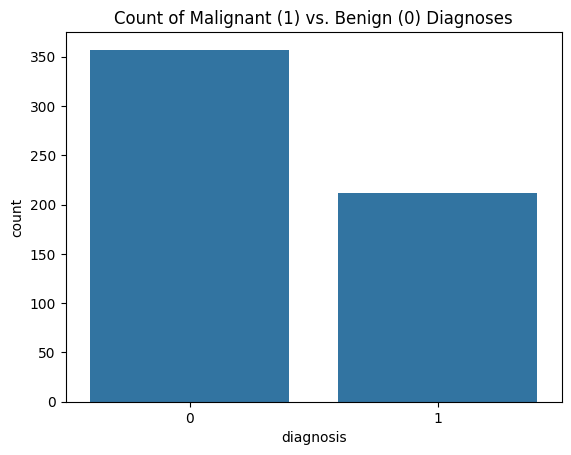

In [12]:
sns.countplot(x='diagnosis', data=df)
plt.title('Count of Malignant (1) vs. Benign (0) Diagnoses')
plt.show()

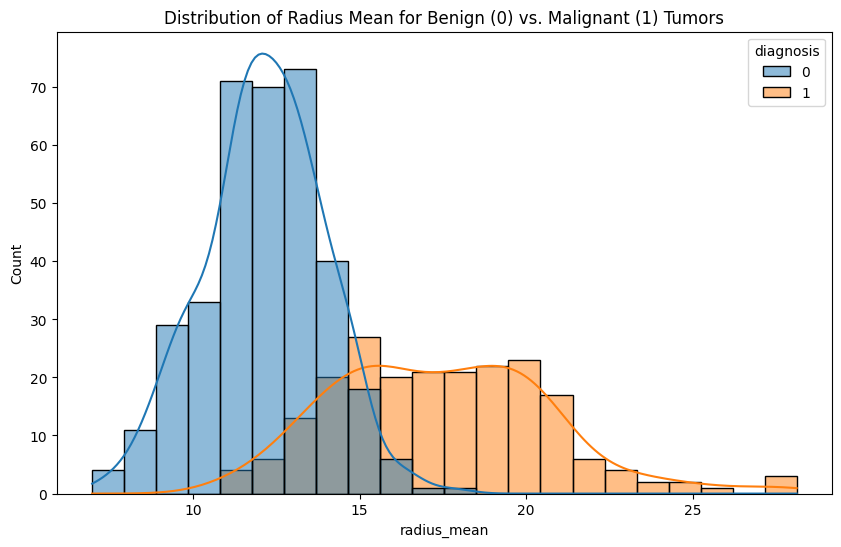

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True)
plt.title('Distribution of Radius Mean for Benign (0) vs. Malignant (1) Tumors')
plt.show()

### 3.1 Correlation Heatmap

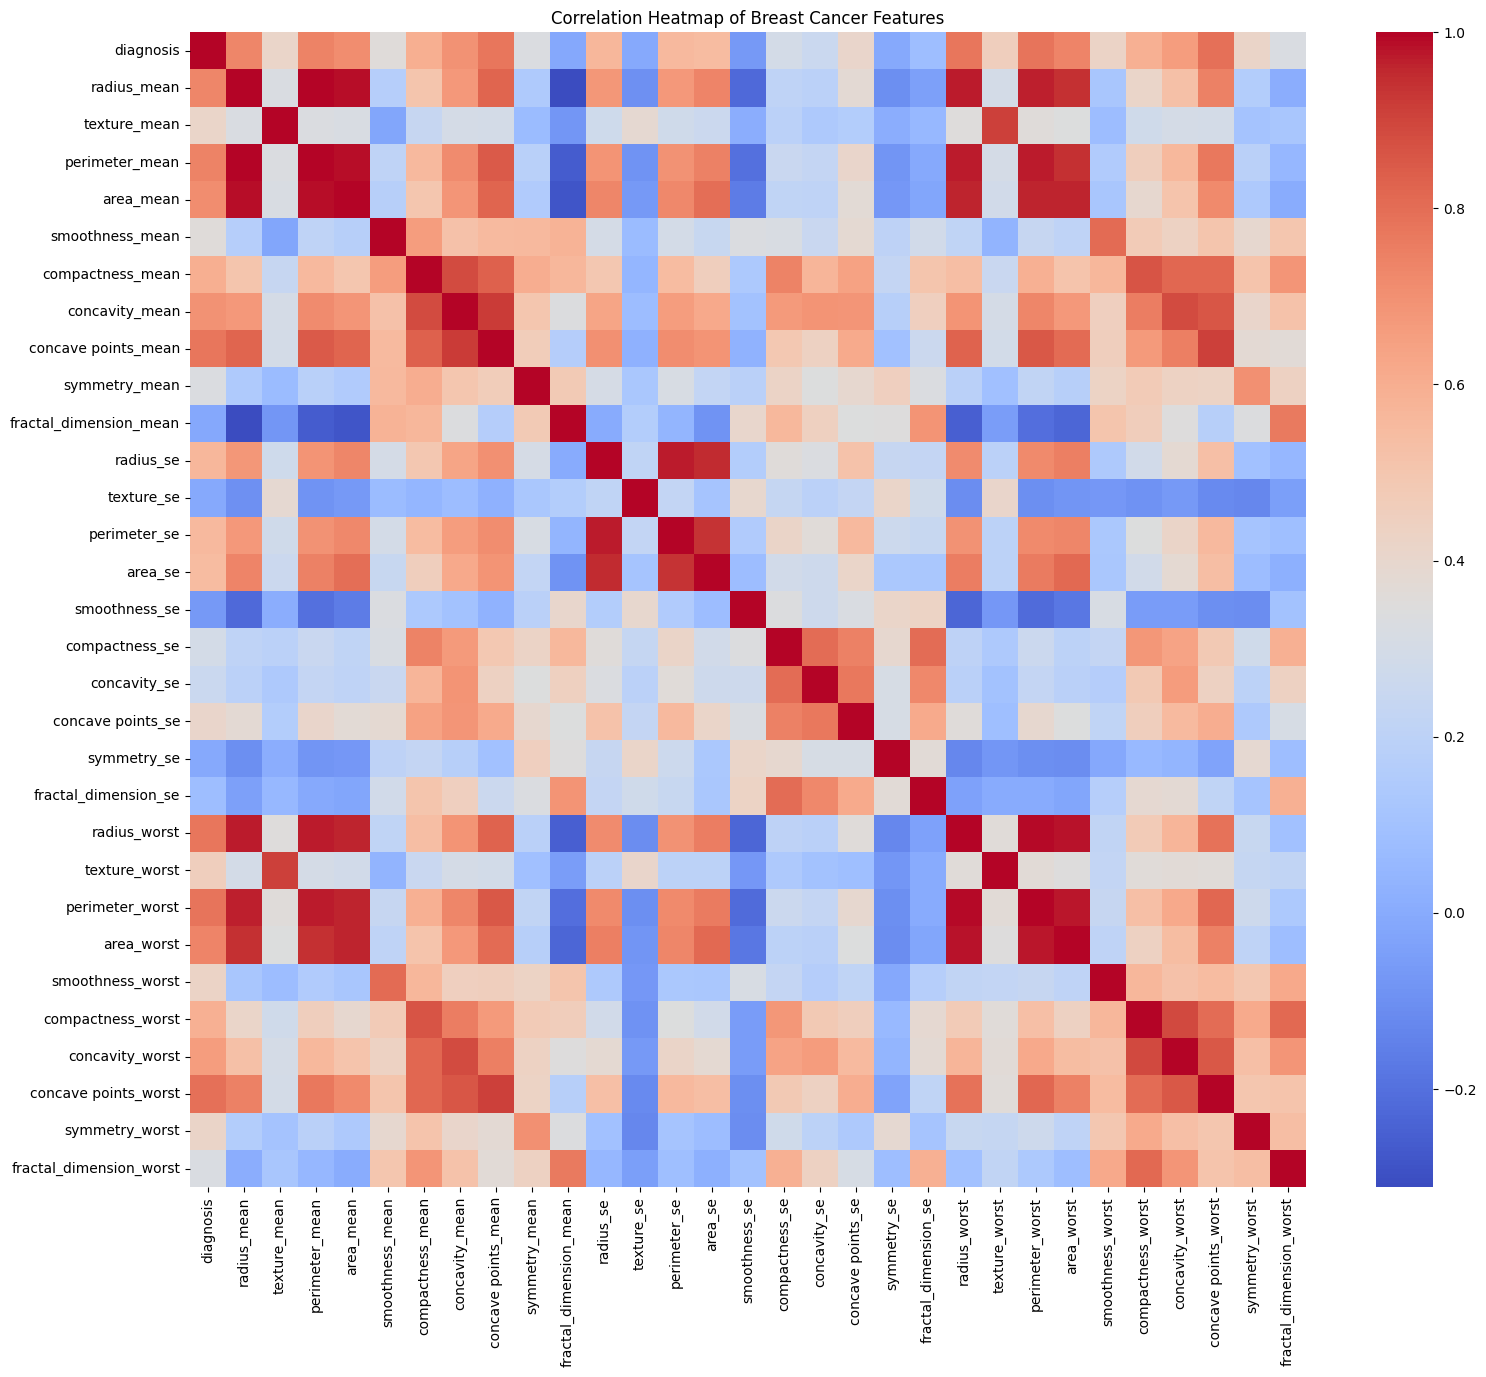

In [14]:
# Calculate correlations, excluding the 'id' column
corr_matrix = df.drop('id', axis=1).corr()

# Set up the figure size
plt.figure(figsize=(18, 15))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

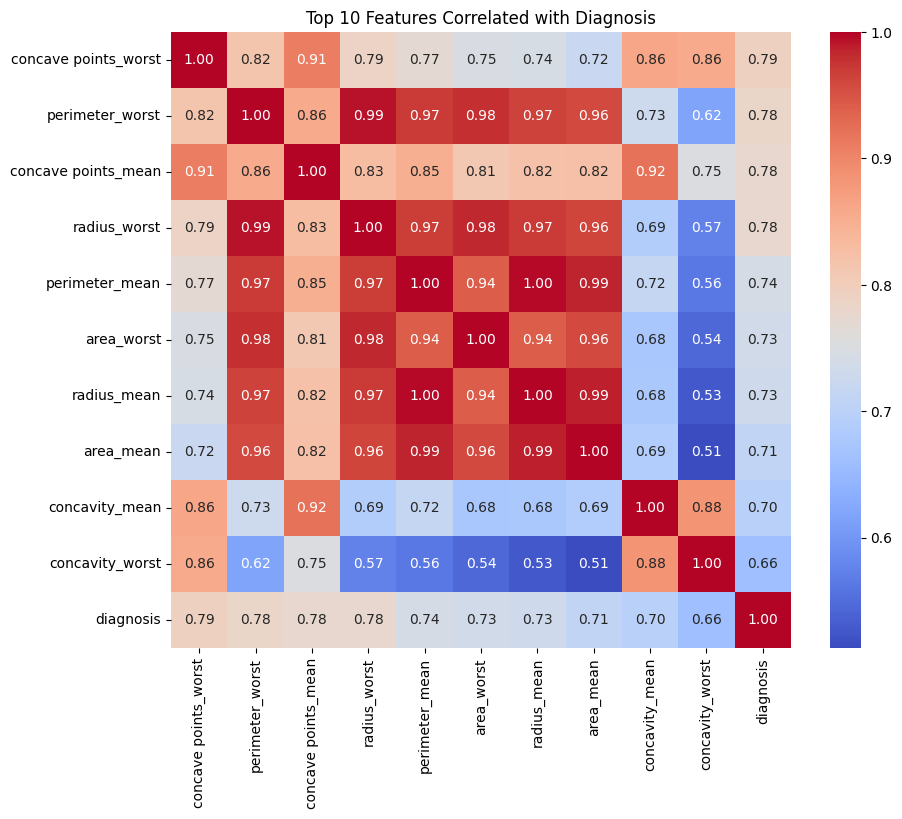

In [15]:
# Get the 10 features most correlated with diagnosis
top_corr_features = corr_matrix['diagnosis'].abs().sort_values(ascending=False).index[1:11]

# Create a new correlation matrix with only these features
focused_corr_matrix = df[top_corr_features].join(df['diagnosis']).corr()

# Plot the focused heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(focused_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 10 Features Correlated with Diagnosis')
plt.show()

In [16]:
# X contains all columns except for 'id' and 'diagnosis'
X = df.drop(['id', 'diagnosis'], axis=1)

# y contains only the 'diagnosis' column
y = df['diagnosis']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


We use StandardScaler to scale our features. This ensures that features with larger ranges (like area_mean) don't unfairly dominate the distance calculations in the KNN algorithm

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [29]:
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [21]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
y_pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



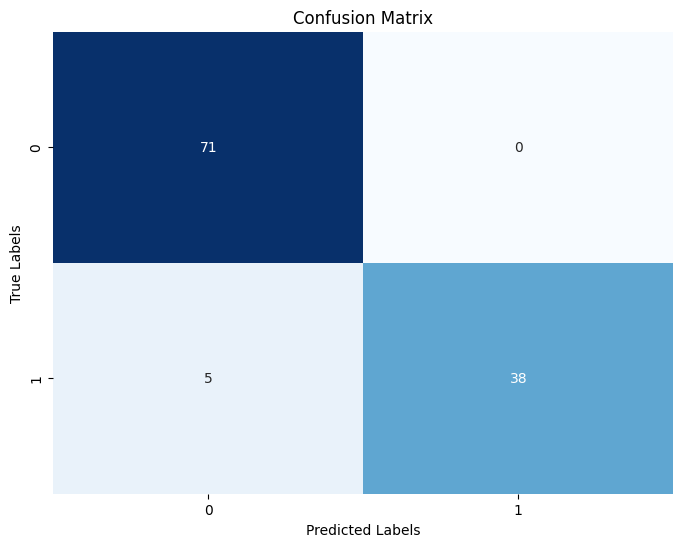

In [26]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Create a new KNN model
knn_scaled = KNeighborsClassifier(n_neighbors=5)

# Train it on the SCALED data
knn_scaled.fit(X_train_scaled, y_train)

# Make predictions on the SCALED test data
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate the new predictions
print("--- Results on Scaled Data ---")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

--- Results on Scaled Data ---
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [31]:
import joblib

# Save the trained model to a file
joblib.dump(knn_scaled, 'breast_cancer_model.joblib')

# Save the scaler to a file
joblib.dump(scaler, 'scaler.joblib')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.
